In [144]:
import aotools
import soapy
import numpy as np
import matplotlib.pyplot as plt

In [145]:
"""
Rectangular function
"""

def rect(x,a):
    
    y = np.zeros_like(x)
    
    for i, xn in enumerate(x):
        
        if (abs(xn) < a / 2.0):
            
            y[i] = 1.0
            
        if (abs(xn) == a / 2.0):
            
            y[i] = 0.5
            
        if (abs(xn) > a / 2.0):
            
            y[i] = 0.0
            
    return y
        

In [146]:
r0 = 0.1 #Fried parameter [m] - typically 5-10 cm for vertical viewing 
N = 1024 #pixel number
#delta = 0.01 #length scale of pixels [m]
L0 = 100.0 #Length of outer scale [m] - typically 100 m
l0 = 0.01 #Length of inner scale [m] - typically 1-100 mm


L = 1e-1 # total size of the grid [m]
delta1 = L / N # grid spacing of source screen [m]
D = 2e-3 # diameter of the aperture [m]
wvl = 1e-6 # optical wavelength [m]
k = 2*np.pi / wvl # optical wavevector [1/m]
Dz = 2.0 # propagation distance [m]

#***************************#
delta2 = (wvl * Dz / (N*delta1))  # grid spacing of observation screen [m]

delta = delta1

In [147]:
ps = aotools.turbulence.phasescreen.ft_sh_phase_screen(r0, N, delta, L0, l0, FFT=None, seed=None)

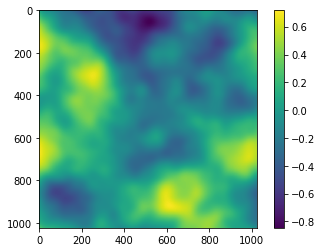

In [148]:
plt.imshow(ps)
plt.colorbar()

In [149]:
"""
Source screen grid 
"""

x1 = delta1*np.arange(-N/2,N/2, dtype = complex)
y1 = delta1*np.arange(-N/2,N/2, dtype = complex)

apx,apy = np.meshgrid(rect(x1,D),rect(y1,D))
ap = apx * apy

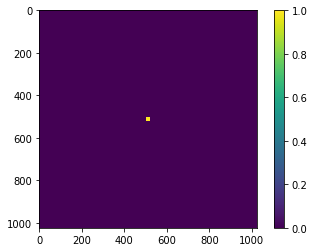

In [150]:
plt.imshow(np.real(ap))
plt.colorbar()
plt.show()

In [151]:
"""
Propagate source two step - 
"""

Uout = aotools.opticalpropagation.twoStepFresnel(ap, wvl, delta1, delta2, Dz)

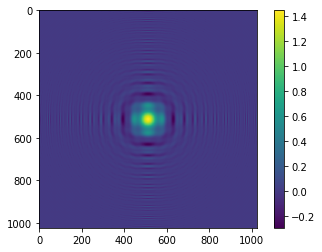

In [152]:
plt.imshow(np.real(Uout))
plt.colorbar()
plt.show()

In [153]:
Uout = Uout*ps

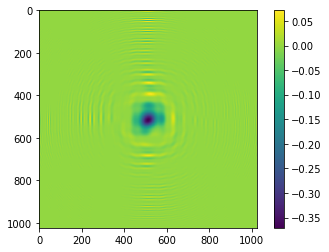

In [154]:
plt.imshow(np.real(Uout))
plt.colorbar()
plt.show()